In [1]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import yaml
import os
import pandas as pd
import cv2

In [2]:
DATASETS = "food_dataset"

In [3]:
with open(f'../datasets/{DATASETS}/data.yaml', 'r') as file:
    data_yaml = yaml.safe_load(file)

In [4]:
LABELS = data_yaml['names']
display(LABELS)

['asmi',
 'burger',
 'cutlet',
 'dhal wade',
 'donut',
 'egg bun',
 'fish bun',
 'halapa',
 'hoppers',
 'hotdog',
 'jam bun',
 'kimbula bun',
 'lavariya',
 'pan cake',
 'pastry',
 'patis',
 'pizza',
 'roll',
 'roti',
 'samosa',
 'sandwitch',
 'sosage bun',
 'spunchi',
 'tea bun',
 'uludu wade',
 'veg bun']

In [5]:
IMAGE_PATH = f'../datasets/{DATASETS}/train/images/'
LABEL_PATH = f'../datasets/{DATASETS}/train/labels/'

In [6]:
img_lst = sorted(os.listdir(IMAGE_PATH))
lbl_lst = sorted(os.listdir(LABEL_PATH))

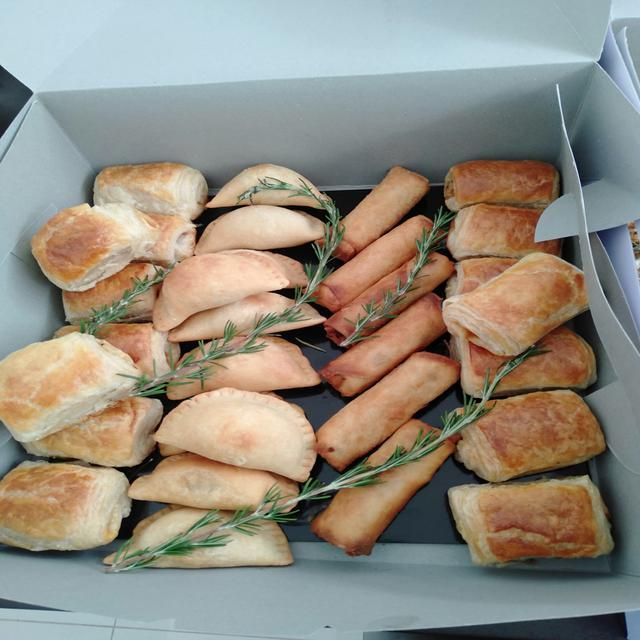

In [7]:
img = Image.open(os.path.join(IMAGE_PATH, img_lst[30]))
img

In [8]:
df = pd.read_csv(os.path.normpath(os.path.join(LABEL_PATH, lbl_lst[30])),
                 delimiter=" ",
                 header=None,
                 names=["classe", "x", "y", "width", "height"])

In [9]:
df

,classe,x,y,width,height
0,15,0.366406,0.453906,0.242969,0.117969
1,15,0.370312,0.682813,0.264062,0.157031


In [10]:
def map_classes_to_labels(df, labels):
    """
    Mapeia inteiros na coluna 'classe' de um DataFrame para strings usando um array de labels.

    Parameters:
    - df (pd.DataFrame): O DataFrame que contém a coluna 'classe'.
    - labels (list): Lista de strings que representam as classes.

    Returns:
    - pd.DataFrame: DataFrame com a coluna 'classe' mapeada para strings.
    """
    # Verifica se a coluna 'classe' está no DataFrame
    if "classe" not in df.columns:
        raise ValueError("O DataFrame não contém uma coluna 'classe'.")

    # Verifica se os índices da coluna 'classe' são válidos para o array de labels
    if df["classe"].max() >= len(labels):
        raise ValueError(
            "Existem valores na coluna 'classe' que excedem o tamanho do array de labels."
        )

    # Mapeia os inteiros para os respectivos labels
    df["classe"] = df["classe"].apply(lambda x: labels[int(x)])

    return df

In [11]:
df2 = map_classes_to_labels(df, LABELS)
df2

,classe,x,y,width,height
0,patis,0.366406,0.453906,0.242969,0.117969
1,patis,0.370312,0.682813,0.264062,0.157031


In [12]:
def draw_bounding_boxes(image: Image.Image, df: pd.DataFrame) -> Image.Image:
    """
    Desenha bounding boxes e classes em uma imagem.

    Parameters:
    - image: PIL.Image.Image - A imagem na qual desenhar.
    - df: pd.DataFrame - DataFrame com colunas ["classe", "x", "y", "width", "height"].

    Returns:
    - image: PIL.Image.Image - A imagem com bounding boxes desenhadas.
    """
    image = image.copy()
    draw = ImageDraw.Draw(image)
    # font = ImageFont.load_default()
    font = ImageFont.truetype("arial.ttf", 25)

    # Dimensões da imagem
    img_width, img_height = image.size

    # Itera sobre cada linha do dataframe
    for _, row in df.iterrows():
        classe = row["classe"]
        x_center = row["x"] * img_width
        y_center = row["y"] * img_height
        width = row["width"] * img_width
        height = row["height"] * img_height

        # Calcula os cantos da bounding box
        left = x_center - width / 2
        top = y_center - height / 2
        right = x_center + width / 2
        bottom = y_center + height / 2

        # Desenha o retângulo e o texto da classe
        draw.rectangle([left, top, right, bottom], outline="red", width=2)
        draw.text((left, top - 30), str(classe), fill="yellow", font=font)

    return image

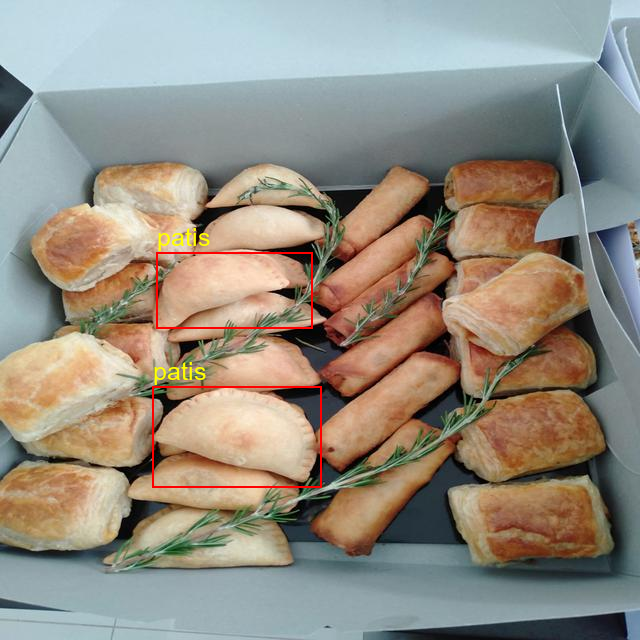

In [13]:
draw_bounding_boxes(img, df)